# Introduction
## Expressions
The aim of this jupyter notebook is to study and test the functions $\lambda_0$ and $\mu_0$

Their exact integral expression is

$$\lambda_0(t) = \frac{1}{2\xi_v}\int_0^{\ell(t)}dx \, e^{-x/\xi_v}\left[ c^a - \big(\delta  C_1(t) - c^a \big)\frac{\sinh{\left(\frac{x-\ell(t)}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s\big)} } +  \big(\delta  C_2(t) - c^a \big)\frac{\sinh{\left(\frac{x}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s} \big)}\right]$$
$$\mu_0(t) = -\frac{1}{2\xi_v}\int_0^{\ell(t)}dx \, e^{x/\xi_v}\left[ c^a - \big(\delta  C_1(t) - c^a \big)\frac{\sinh{\left(\frac{x-\ell(t)}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s\big)} } +  \big(\delta  C_2(t) - c^a \big)\frac{\sinh{\left(\frac{x}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s} \big)}\right]$$

However, general functions $\lambda(x)$ and $\mu(x)$ may be calculated analytically, with expression in $x=0$
$$\lambda(x=0) =  \frac{c^a}{2} \left[ 1 - e^{-1/\chi_v}\right] + \frac{\delta C_1-c^a}{2 \sinh(1/\chi_s)} \frac{\left[\sinh \left(\frac{1}{\chi_s} \right) - \frac{\chi_v}{\chi_s} \cosh \left(\frac{1}{\chi_s} \right) \right] + \frac{\chi_v}{\chi_s}e^{-1/\chi_v}}{1 - \left(\frac{\chi_v}{\chi_s}\right)^2} - \frac{\delta C_2-c^a}{2 \sinh(1/\chi_s)} \frac{-\frac{\chi_v}{\chi_s} +  e^{-1/\chi_v}\left[\sinh \left(\frac{1}{\chi_s} \right) + \frac{\chi_v}{\chi_s}\cosh \left(\frac{1}{\chi_s} \right) \right]}{1 - \left(\frac{\chi_v}{\chi_s}\right)^2}$$

$$\mu(x=0) = \frac{c^a}{2} \left[1 - e^{1/\chi_v}\right] - \frac{\delta C_1-c^a}{2 \sinh(1/\chi_s)} \frac{-\left[\sinh \left(\frac{1}{\chi_s} \right) + \frac{\chi_v}{\chi_s} \cosh \left(\frac{1}{\chi_s} \right) \right] + \frac{\chi_v}{\chi_s}e^{1/\chi_v}}{1 - \left(\frac{\chi_v}{\chi_s}\right)^2}+ \frac{\delta C_2-c^a}{2 \sinh(1/\chi_s)} \frac{ -\frac{\chi_v}{\chi_s} - e^{1/\chi_v}\left[ \sinh\left(\frac{1}{\chi_s}\right) - \frac{\chi_v}{\chi_s}\cosh \left(\frac{1}{\chi_s} \right) \right]}{1 - \left(\frac{\chi_v}{\chi_s}\right)^2}$$


## Limiting cases
### $\chi_v, \chi_s \gg 1$
Using the analytical expressions, and the fact that 
$$\cosh(x) \underset{0}{\sim} 1 , \sinh(x) \underset{0}{\sim} x $$
we have
$$\lambda_0 \sim \frac{\delta C_1 - \delta C_2}{2} \frac{1}{1- \left(\frac{\chi_v}{\chi_s} \right)^2}$$
and
$$\mu_0 \sim \frac{\delta C_1 - \delta C_2}{2} \frac{1}{1- \left(\frac{\chi_v}{\chi_s} \right)^2}$$

### $\chi_v, \chi_s \ll 1$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

color_list = ['#AB3FFF', '#0098FF', '#23B831', '#87D87F', '#FBEB00', '#FF8B00', '#FF2300']

In [4]:
ell = 1.
x = np.linspace(0, ell, 101)


# Comparison Numerical vs Analytical solution



In [17]:
def integrand_lambda(x, xi_s, xi_v, ell, C1, C2, ca) :
    s1 = (C1-ca)*np.sinh((x-ell)/xi_s)/np.sinh(ell/xi_s)
    s2 = (C2-ca)*np.sinh(x/xi_s)/np.sinh(ell/xi_s)
    return 0.5*np.exp(-x/xi_v)*(ca - s1 + s2) / xi_v

def integrand_mu(x, xi_s, xi_v, ell, C1, C2, ca) :
    s1 = (C1-ca)*np.sinh((x-ell)/xi_s)/np.sinh(ell/xi_s)
    s2 = (C2-ca)*np.sinh(x/xi_s)/np.sinh(ell/xi_s)
    return -0.5*np.exp(x/xi_v)*(ca - s1 + s2) / xi_v

In [18]:
xi_s = np.logspace(-3, 3, 101)
xi_v = np.array([1e-3, 1e-2, 1e-1, 1., 10., 100., 1000.])
C1, C2, ca = 2., 1., 0. 

I, Ierr = np.zeros((len(xi_v), len(xi_s))), np.zeros((len(xi_v), len(xi_s)))

for k in range(len(xi_v)) :
    for i in range(len(xi_s)) :
        I[k, i], Ierr[k, i] = scipy.integrate.quad(integrand_lambda, 0, ell, args=(xi_s[i], xi_v[k], ell, C1, C2, ca))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in sinh
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


Text(0.5,1,u'$\\lambda_0$ as function of $\\xi_s$ for multiple $\\xi_v$')

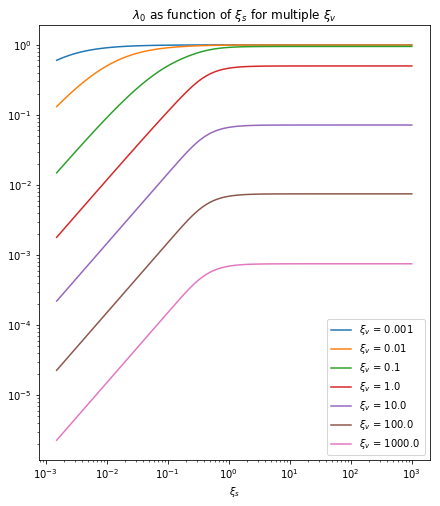

In [19]:
plt.figure(figsize=(7, 8))
plt.xscale('log')
plt.yscale('log')
for k in range(len(xi_v)) :
    plt.plot(xi_s, I[k, :], label = r'$\xi_v$ = '+str(xi_v[k]))
    
    
plt.xlabel(r'$\xi_s$')
plt.legend()
plt.title(r'$\lambda_0$ as function of $\xi_s$ for multiple $\xi_v$')

In [20]:
def I_0_minus(x, chiv, chis) :
    if chiv - chis == 0. :
        return 0.5*(x-1) + 0.25*chiv*(np.exp(-2*x/chiv) - np.exp(-2./chiv))
    return (-chiv*np.exp(-x/chiv)*(np.sinh(x/chis)+(chiv/chis)*np.cosh(x/chis)) + chiv*np.exp(-1./chiv)*(np.sinh(1./chis) + (chiv/chis)*np.cosh(1./chis)))/(1. - (chiv/chis)**2)

def I_1_minus(x, chiv, chis) :
    if chiv - chis == 0 :
        return 0.5*(x-1.)*np.exp(-1./chiv) + 0.25*chiv*(np.exp((-2.*x+1)/chiv) - np.exp(-1./chiv))
    return (-chiv*np.exp(-x/chiv)*(np.sinh((x-1.)/chis) + (chiv/chis)*np.cosh((x-1.)/chis)) + (chiv*chiv/chis)*np.exp(-1/chiv)) /(1. - (chiv/chis)**2)

def I_0_plus(x, chiv, chis) :
    if chiv - chis == 0 :
        return 0.25 * chiv * (np.exp(2.*x/chiv) - np.exp(2./chiv)) - 0.5*(x-1.)
    return (Xv*np.exp(x/chiv)*(np.sinh(x/chis)-(chiv/chis)*np.cosh(x/chis)) - chiv*np.exp(1/chiv)*(np.sinh(1./chis) - (chiv/chis)*np.cosh(1./chis)))/(1. - (chiv/chis)**2)

def I_1_plus(x, chiv, chis) :
    if chiv - chis == 0 :
        return 0.25 * chiv * (np.exp((2.*x-1)/chiv) - np.exp(1./chiv)) - 0.5*(x-1.)*np.exp(1./chiv)
    return (chiv*np.exp(x/chiv)*(np.sinh((x-1.)/chis) - (chiv/chis)*np.cosh((x-1.)/chis)) + (chiv*chiv/chis)*np.exp(1/chiv)) /(1. - (chiv/chis)**2)

def lam(x, chiv, chis, C1, C2, ca=0) :
    la = 0.5*ca * (np.exp(-x/chiv) - np.exp(-1./chiv))
    l1 = (C1-ca) * I_1_minus(x, chiv, chis) / (2*chiv*np.sinh(1./chis))
    l2 = (C2-ca) * I_0_minus(x, chiv, chis) / (2*chiv*np.sinh(1./chis))
    return la + l1 - l2
    #return 0.

def mu(x, chiv, chis, C1, C2, ca=0) :
    ma = 0.5*ca * (np.exp(x/chiv) - np.exp(1./chiv))
    m1 = (C1-ca) * I_1_plus(x, chiv, chis) / (2*chiv*np.sinh(1./chis))
    m2 = (C2-ca) * I_0_plus(x, chiv, chis) / (2*chiv*np.sinh(1./chis))
    return ma - m1 + m2
    #return 0.



In [21]:
I2 = np.zeros((len(xi_v), len(xi_s)))
for k in range(len(xi_v)) :
    for i in range(len(xi_s)) : 
        I2[k, i] = lam(0, xi_v[k]/ell, xi_s[i]/ell, C1, C2, ca)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in sinh
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in sinh
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in sinh
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in cosh
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in sinh
  afte

Text(0.5,1,u'$\\lambda_0$ as function of $\\xi_s$ for multiple $\\xi_v$ ($\\ell$ = 1.0 ; $c^a$ = 0.0)\n$C_1$ = 2.0 ; $C_2$ = 1.0')

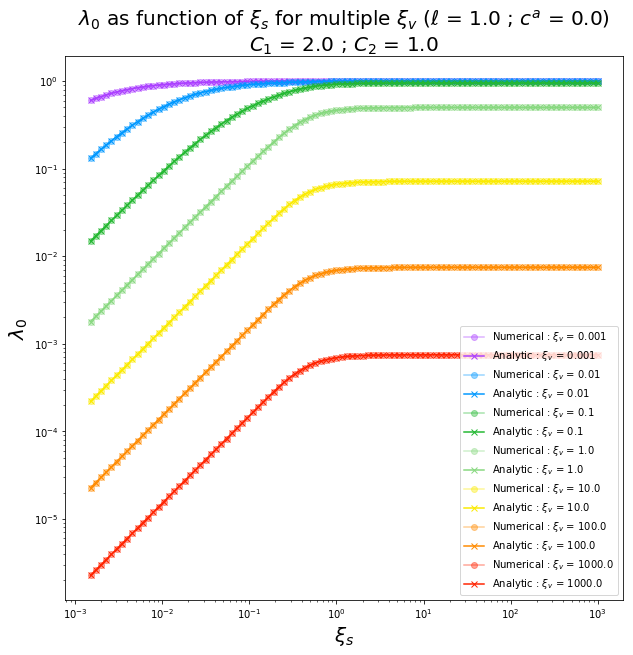

In [23]:
plt.figure(figsize=(10, 10))

plt.xscale('log')
plt.yscale('log')
for k in range(len(xi_v)) :
    plt.plot(xi_s, I[k, :], label = r'Numerical : $\xi_v$ = '+str(xi_v[k]), marker='o', alpha=0.4, color=color_list[k])
    plt.plot(xi_s, I2[k, :], label = r'Analytic : $\xi_v$ = '+str(xi_v[k]), marker='x', color=color_list[k])
    
plt.xlabel(r'$\xi_s$', fontsize=20)
plt.ylabel(r'$\lambda_0$', fontsize=20)
plt.legend()
plt.title(r'$\lambda_0$ as function of $\xi_s$ for multiple $\xi_v$ ($\ell$ = '+str(ell)+' ; $c^a$ = '+str(ca)+')\n$C_1$ = '+str(C1)+' ; $C_2$ = '+str(C2), fontsize=20)


## $C_1 = 10$, $C_2 = 1$

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in sinh
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in sinh
/usr/local/lib/python

Text(0.5,1,u'$\\lambda_0$ as function of $\\xi_s$ for multiple $\\xi_v$ ($\\ell$ = 1.0 ; $c^a$ = 0.0)\n$C_1$ = 10.0 ; $C_2$ = 1.0')

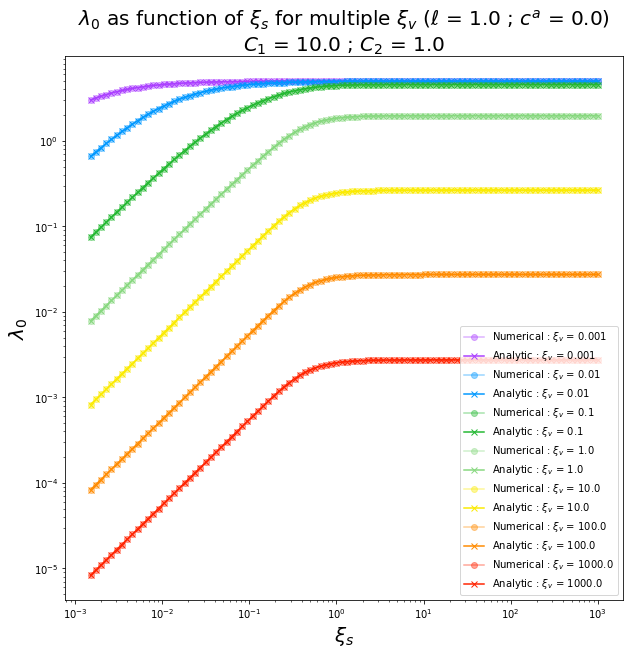

In [24]:
xi_s = np.logspace(-3, 3, 101)
xi_v = np.array([1e-3, 1e-2, 1e-1, 1., 10., 100., 1000.])
C1, C2, ca = 10., 1., 0. 

I, Ierr = np.zeros((len(xi_v), len(xi_s))), np.zeros((len(xi_v), len(xi_s)))

for k in range(len(xi_v)) :
    for i in range(len(xi_s)) :
        I[k, i], Ierr[k, i] = scipy.integrate.quad(integrand_lambda, 0, ell, args=(xi_s[i], xi_v[k], ell, C1, C2, ca))
        

        
I2 = np.zeros((len(xi_v), len(xi_s)))
for k in range(len(xi_v)) :
    for i in range(len(xi_s)) : 
        I2[k, i] = lam(0, xi_v[k]/ell, xi_s[i]/ell, C1, C2, ca)

plt.figure(figsize=(10, 10))

plt.xscale('log')
plt.yscale('log')
for k in range(len(xi_v)) :
    plt.plot(xi_s, I[k, :], label = r'Numerical : $\xi_v$ = '+str(xi_v[k]), marker='o', alpha=0.4, color=color_list[k])
    plt.plot(xi_s, I2[k, :], label = r'Analytic : $\xi_v$ = '+str(xi_v[k]), marker='x', color=color_list[k])
    
plt.xlabel(r'$\xi_s$', fontsize=20)
plt.ylabel(r'$\lambda_0$', fontsize=20)
plt.legend()
plt.title(r'$\lambda_0$ as function of $\xi_s$ for multiple $\xi_v$ ($\ell$ = '+str(ell)+' ; $c^a$ = '+str(ca)+')\n$C_1$ = '+str(C1)+' ; $C_2$ = '+str(C2), fontsize=20)


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in sinh
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in sinh
/usr/local/lib/python

Text(0.5,1,u'$\\lambda_0$ as function of $\\xi_s$ for multiple $\\xi_v$ ($\\ell$ = 1.0 ; $c^a$ = 0.0)\n$C_1$ = 100.0 ; $C_2$ = 1.0')

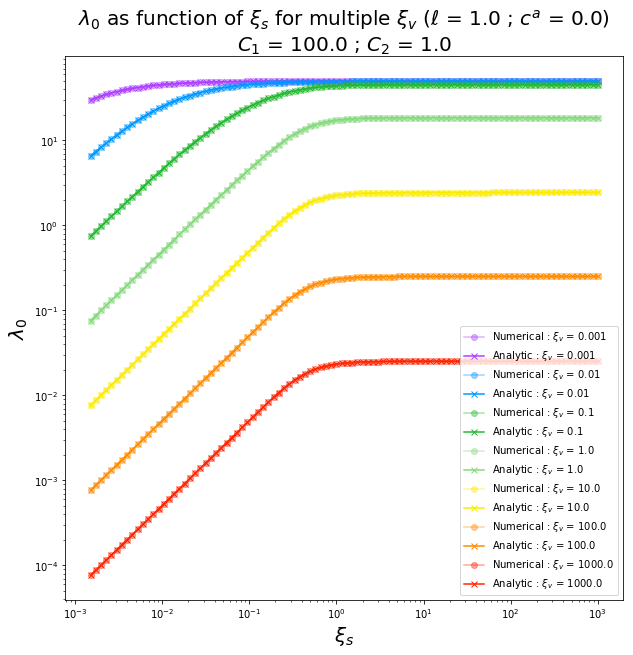

In [25]:
xi_s = np.logspace(-3, 3, 101)
xi_v = np.array([1e-3, 1e-2, 1e-1, 1., 10., 100., 1000.])
C1, C2, ca = 100., 1., 0. 

I, Ierr = np.zeros((len(xi_v), len(xi_s))), np.zeros((len(xi_v), len(xi_s)))

for k in range(len(xi_v)) :
    for i in range(len(xi_s)) :
        I[k, i], Ierr[k, i] = scipy.integrate.quad(integrand_lambda, 0, ell, args=(xi_s[i], xi_v[k], ell, C1, C2, ca))
        

        
I2 = np.zeros((len(xi_v), len(xi_s)))
for k in range(len(xi_v)) :
    for i in range(len(xi_s)) : 
        I2[k, i] = lam(0, xi_v[k]/ell, xi_s[i]/ell, C1, C2, ca)

plt.figure(figsize=(10, 10))

plt.xscale('log')
plt.yscale('log')
for k in range(len(xi_v)) :
    plt.plot(xi_s, I[k, :], label = r'Numerical : $\xi_v$ = '+str(xi_v[k]), marker='o', alpha=0.4, color=color_list[k])
    plt.plot(xi_s, I2[k, :], label = r'Analytic : $\xi_v$ = '+str(xi_v[k]), marker='x', color=color_list[k])
    
plt.xlabel(r'$\xi_s$', fontsize=20)
plt.ylabel(r'$\lambda_0$', fontsize=20)
plt.legend()
plt.title(r'$\lambda_0$ as function of $\xi_s$ for multiple $\xi_v$ ($\ell$ = '+str(ell)+' ; $c^a$ = '+str(ca)+')\n$C_1$ = '+str(C1)+' ; $C_2$ = '+str(C2), fontsize=20)



/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in sinh
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in sinh
  if __name__ == '__main__':
/usr/local/lib/python2.7/

Text(0.5,1,u'$\\lambda_0$ as function of $\\xi_s$ for multiple $\\xi_v$ ($\\ell$ = 1.0 ; $c^a$ = 0.0)\n$C_1$ = 1.0 ; $C_2$ = 100.0')

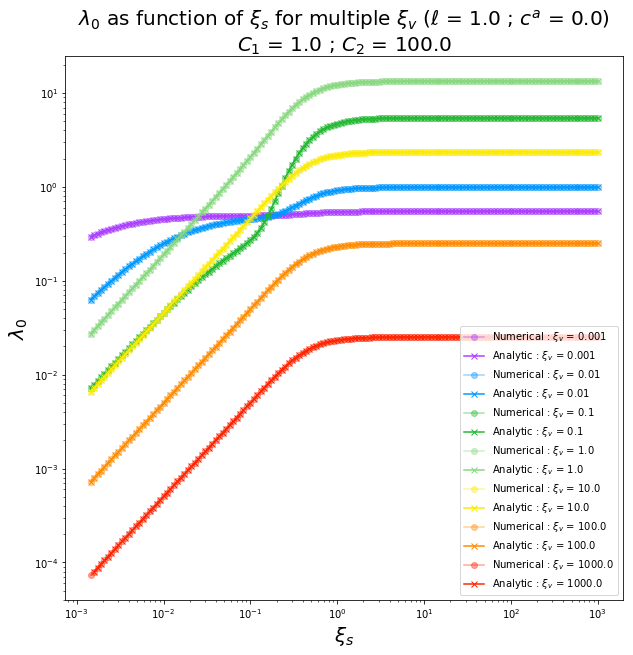

In [27]:
xi_s = np.logspace(-5, 3, 201)
xi_v = np.array([1e-3, 1e-2, 1e-1, 1., 10., 100., 1000.])
C1, C2, ca = 1., 100., 0. 

I, Ierr = np.zeros((len(xi_v), len(xi_s))), np.zeros((len(xi_v), len(xi_s)))

for k in range(len(xi_v)) :
    for i in range(len(xi_s)) :
        I[k, i], Ierr[k, i] = scipy.integrate.quad(integrand_lambda, 0, ell, args=(xi_s[i], xi_v[k], ell, C1, C2, ca))
        

        
I2 = np.zeros((len(xi_v), len(xi_s)))
for k in range(len(xi_v)) :
    for i in range(len(xi_s)) : 
        I2[k, i] = lam(0, xi_v[k]/ell, xi_s[i]/ell, C1, C2, ca)

plt.figure(figsize=(10, 10))

plt.xscale('log')
plt.yscale('log')
for k in range(len(xi_v)) :
    plt.plot(xi_s, I[k, :], label = r'Numerical : $\xi_v$ = '+str(xi_v[k]), marker='o', alpha=0.4, color=color_list[k])
    plt.plot(xi_s, I2[k, :], label = r'Analytic : $\xi_v$ = '+str(xi_v[k]), marker='x', color=color_list[k])
    
plt.xlabel(r'$\xi_s$', fontsize=20)
plt.ylabel(r'$\lambda_0$', fontsize=20)
plt.legend()
plt.title(r'$\lambda_0$ as function of $\xi_s$ for multiple $\xi_v$ ($\ell$ = '+str(ell)+' ; $c^a$ = '+str(ca)+')\n$C_1$ = '+str(C1)+' ; $C_2$ = '+str(C2), fontsize=20)



# Variations of $\ell$

In [9]:
ell_list = np.logspace(-3, 3, 101)

xi_s, xi_v = np.array([1e-3, 1e-2, 1e-1, 1., 10., 100., 1000.]), np.array([1e-3, 1e-2, 1e-1, 1., 10., 100., 1000.])
C1, C2, ca = 2., 1., 0.



In [10]:
I_ell = np.zeros((len(xi_v), len(xi_s), len(ell_list)))

for k in range(len(xi_v)) :
    for i in range(len(xi_s)) :
        for n in range(len(ell_list)) :
            I_ell[k, i, n] = lam(0, xi_v[k]/ell_list[n], xi_s[i]/ell_list[n], C1, C2, ca)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in sinh
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in sinh
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in sinh
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in cosh
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in sinh
  afte

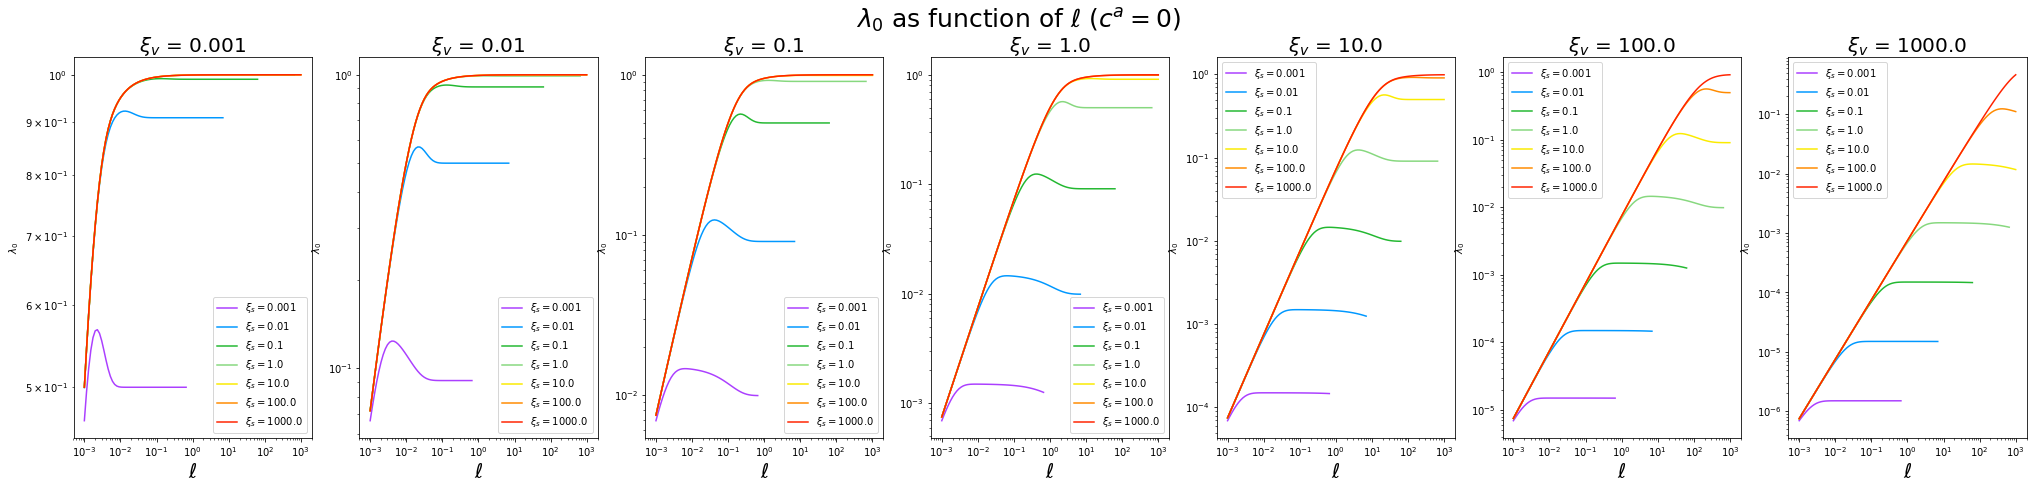

In [11]:
fig, ax = plt.subplots(1, 7, figsize=(35, 7))
plt.suptitle(r'$\lambda_0$ as function of $\ell$ ($c^a=0$)', fontsize=25)
for k in range(len(xi_v)) :
    for i in range(len(xi_s)) :
        ax[k].loglog(ell_list, I_ell[k, i, :], color = color_list[i], label = r'$\xi_s = $' + str(xi_s[i]))
    ax[k].set_xlabel(r'$\ell$', fontsize=20)
    ax[k].set_ylabel(r'$\lambda_0$')
    ax[k].set_title(r'$\xi_v$ = '+str(xi_v[k]), fontsize=20)
    ax[k].legend()
    

# Variations of $c^a$

In [12]:
ca_list = np.logspace(-3, 3, 101)

xi_s, xi_v = np.array([1e-3, 1e-2, 1e-1, 1., 10., 100., 1000.]), np.array([1e-3, 1e-2, 1e-1, 1., 10., 100., 1000.])
ell, C1, C2 = 1., 2., 1.



In [13]:
I_ca = np.zeros((len(xi_v), len(xi_s), len(ell_list)))

for k in range(len(xi_v)) :
    for i in range(len(xi_s)) :
        for n in range(len(ca_list)) :
            I_ca[k, i, n] = lam(0, xi_v[k]/ell, xi_s[i]/ell, C1, C2, ca_list[n])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in sinh
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in sinh
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in sinh
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in cosh
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in sinh
  afte

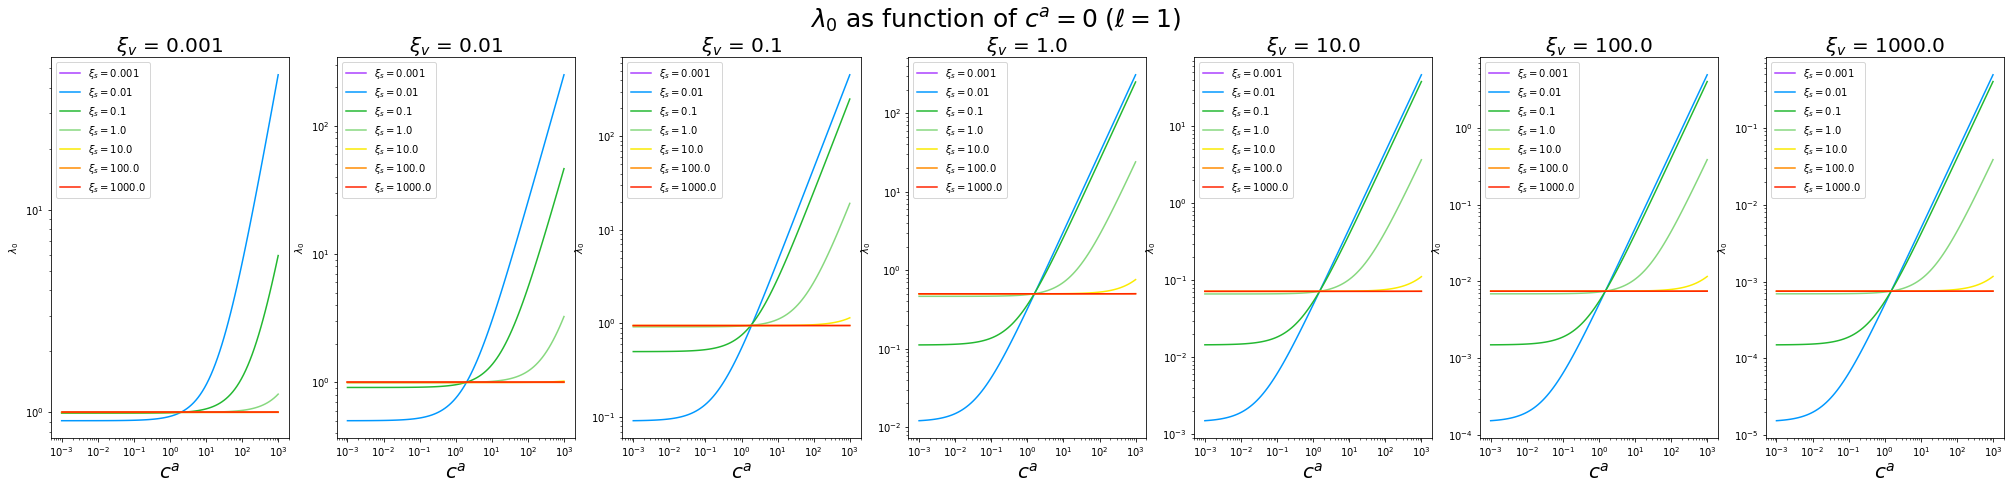

In [14]:
fig, ax = plt.subplots(1, 7, figsize=(35, 7))
plt.suptitle(r'$\lambda_0$ as function of $c^a=0$ ($\ell = 1$)', fontsize=25)
for k in range(len(xi_v)) :
    for i in range(len(xi_s)) :
        ax[k].loglog(ca_list, I_ca[k, i, :], color = color_list[i], label = r'$\xi_s = $' + str(xi_s[i]))
    ax[k].set_xlabel(r'$c^a$', fontsize=20)
    ax[k].set_ylabel(r'$\lambda_0$')
    ax[k].set_title(r'$\xi_v$ = '+str(xi_v[k]), fontsize=20)
    ax[k].legend()

$$\lambda_0(t) = \frac{1}{2\xi_v}\int_{-\ell(t)/2}^{\ell(t)/2}dx \, e^{-x/\xi_v}\left[ c^a - \big(\delta  C_1(t) - c^a \big)\frac{\sinh{\left(\frac{x-\ell(t)}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s\big)} } +  \big(\delta  C_2(t) - c^a \big)\frac{\sinh{\left(\frac{x}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s} \big)}\right]$$
$$\mu_0(t) = -\frac{1}{2\xi_v}\int_0^{\ell(t)}dx \, e^{x/\xi_v}\left[ c^a - \big(\delta  C_1(t) - c^a \big)\frac{\sinh{\left(\frac{x-\ell(t)}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s\big)} } +  \big(\delta  C_2(t) - c^a \big)\frac{\sinh{\left(\frac{x}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s} \big)}\right]$$

# Introduction
## Expressions
The aim of this jupyter notebook is to study and test the functions $\lambda_0$ and $\mu_0$

Their exact integral expression is

$$\lambda_0(t) = \frac{1}{2\xi_v}\int_{-\frac{\ell(t)}{2}}^{\frac{\ell(t)}{2}}dx \, e^{-x/\xi_v}\left[ c^a - \big(\delta  C_1(t) - c^a \big)\frac{\sinh{\left(\frac{x-\frac{\ell(t)}{2}}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s\big)} } +  \big(\delta  C_2(t) - c^a \big)\frac{\sinh{\left(\frac{x+\frac{\ell(t)}{2}}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s} \big)}\right]$$
$$\mu_0(t) = -\frac{1}{2\xi_v}\int_{-\frac{\ell(t)}{2}}^{\frac{\ell(t)}{2}}dx \, e^{x/\xi_v}\left[ c^a - \big(\delta  C_1(t) - c^a \big)\frac{\sinh{\left(\frac{x-\frac{\ell(t)}{2}}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s\big)} } +  \big(\delta  C_2(t) - c^a \big)\frac{\sinh{\left(\frac{x+\frac{\ell(t)}{2}}{\xi_s}\right)} }{\sinh{\big(\ell(t)/\xi_s} \big)}\right]$$



In [23]:
def integrand_lambda(x, xi_s, xi_v, ell, C1, C2, ca) :
    s1 = (C1-ca)*np.sinh((x-0.5*ell)/xi_s)/np.sinh(ell/xi_s)
    s2 = (C2-ca)*np.sinh((x+0.5*ell)/xi_s)/np.sinh(ell/xi_s)
    return 0.5*np.exp(-x/xi_v)*(ca - s1 + s2) / xi_v

def integrand_mu(x, xi_s, xi_v, ell, C1, C2, ca) :
    s1 = (C1-ca)*np.sinh((x-0.5*ell)/xi_s)/np.sinh(ell/xi_s)
    s2 = (C2-ca)*np.sinh((x+0.5*ell)/xi_s)/np.sinh(ell/xi_s)
    return -0.5*np.exp(x/xi_v)*(ca - s1 + s2) / xi_v

In [28]:
ell = 5
xi_s = np.logspace(-3, 6, 201)
xi_v = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1., 10., 100., 1000.])
C1, C2, ca = 2., 1., 0. 

I, Ierr = np.zeros((len(xi_v), len(xi_s))), np.zeros((len(xi_v), len(xi_s)))

for k in range(len(xi_v)) :
    for i in range(len(xi_s)) :
        I[k, i], Ierr[k, i] = scipy.integrate.quad(integrand_lambda, -0.5*ell, 0.5*ell, args=(xi_s[i], xi_v[k], ell, C1, C2, ca))
        
        

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in sinh
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_lau

Text(0.5,1,u'$\\lambda_0$ as function of $\\xi_s$ for multiple $\\xi_v$')

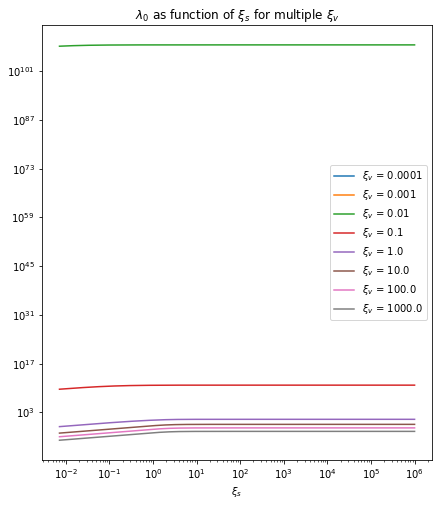

In [29]:
plt.figure(figsize=(7, 8))
plt.xscale('log')
plt.yscale('log')
for k in range(len(xi_v)) :
    plt.plot(xi_s, I[k, :], label = r'$\xi_v$ = '+str(xi_v[k]))
    
    
plt.xlabel(r'$\xi_s$')
plt.legend()
plt.title(r'$\lambda_0$ as function of $\xi_s$ for multiple $\xi_v$')